In [1]:
import pandas as pd 
import numpy as np

from featurewiz import featurewiz

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from scipy.stats import randint
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("train__dataset.csv")
df_test = pd.read_csv("train.csv")

Imported 0.3.0 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [3]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,18137.0,1.846777,0.516020,0.0,2.0,2.00,2.00,4.0
no_of_children,18137.0,0.107515,0.408901,0.0,0.0,0.00,0.00,9.0
no_of_weekend_nights,18137.0,0.811104,0.873470,0.0,0.0,1.00,2.00,7.0
no_of_week_nights,18137.0,2.208965,1.426365,0.0,1.0,2.00,3.00,17.0
type_of_meal_plan,18137.0,0.318465,0.629140,0.0,0.0,0.00,0.00,3.0
required_car_parking_space,18137.0,0.031648,0.175066,0.0,0.0,0.00,0.00,1.0
room_type_reserved,18137.0,0.336770,0.772865,0.0,0.0,0.00,0.00,6.0
lead_time,18137.0,85.377405,86.611736,0.0,17.0,57.00,127.00,443.0
arrival_year,18137.0,2017.820698,0.383616,2017.0,2018.0,2018.00,2018.00,2018.0
arrival_month,18137.0,7.432762,3.076999,1.0,5.0,8.00,10.00,12.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [6]:
df_test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [7]:
df_test.dtypes

id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [8]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42100.0,21049.500000,12153.367503,0.0,10524.75,21049.50,31574.25,42099.0
no_of_adults,42100.0,1.920713,0.524950,0.0,2.00,2.00,2.00,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.00,0.00,0.00,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.00,1.00,2.00,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.00,2.00,3.00,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.00,0.00,0.00,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.00,0.00,0.00,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.00,0.00,1.00,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.00,93.00,155.00,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.00,2018.00,2018.00,2018.0


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [10]:
def plot_test_vs_train_variables_element(train,test,column,target,element_type = 'poly'):
    f, axes = plt.subplots(2, 2, sharey ='row', figsize=(10,6))
    f.tight_layout(pad =3)
    sns.histplot(data=train, x=column, hue=target, element = element_type, shrink =.8, ax = axes[0,0], legend =False).set_title("Train")
    sns.histplot(data=test, x=column, hue=target, element = element_type, shrink =.8, ax = axes[0,1], legend =False).set_title("Test")
    sns.kdeplot(data=train, x=column, hue=target,ax = axes[1,0], legend =False)
    sns.kdeplot(data=test, x=column, hue=target,ax = axes[1,1])
    f.suptitle(column + ' Traning vs Test')

In [11]:
def plot_test_vs_train_variables_multiple(train,test,column,target,multiple_type = 'dodge'):
    f, axes = plt.subplots(2, 2,sharey = 'row', figsize=(10,6))
    f.tight_layout(pad =3)
    sns.histplot(data=train, x=column, hue=target, multiple = multiple_type, shrink =.8, ax = axes[0,0], legend =False).set_title("Train")
    sns.histplot(data=test, x=column, hue=target, multiple = multiple_type, shrink =.8, ax = axes[0,1], legend =False).set_title("Test")
    sns.kdeplot(data=train, x=column, hue=target,ax = axes[1,0], legend =False)
    sns.kdeplot(data=test, x=column, hue=target,ax = axes[1,1])
    f.suptitle(column + ' Traning vs Test')

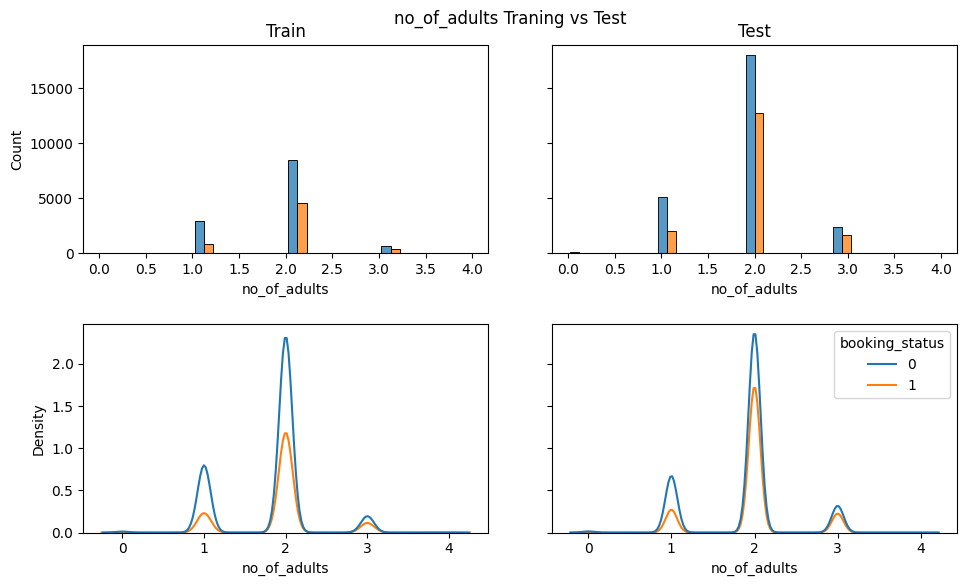

In [12]:
plot_test_vs_train_variables_multiple(df,df_test,"no_of_adults","booking_status")

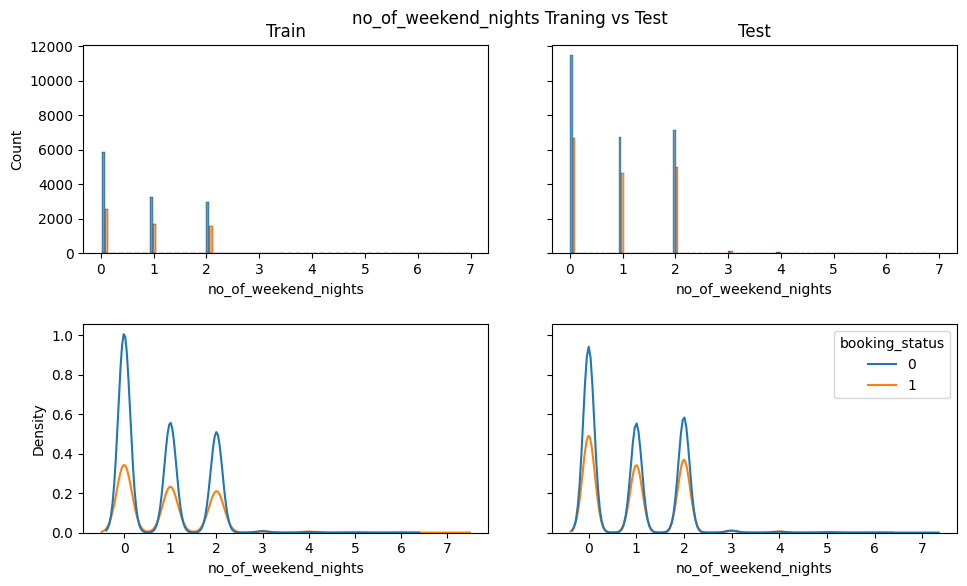

In [13]:
plot_test_vs_train_variables_multiple(df,df_test,"no_of_weekend_nights","booking_status")

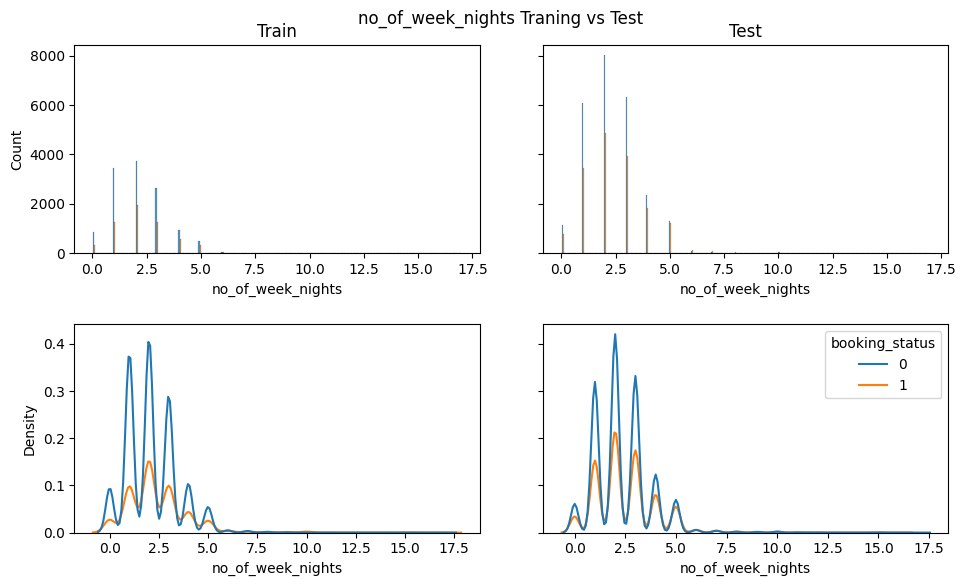

In [14]:
plot_test_vs_train_variables_multiple(df,df_test,"no_of_week_nights","booking_status")

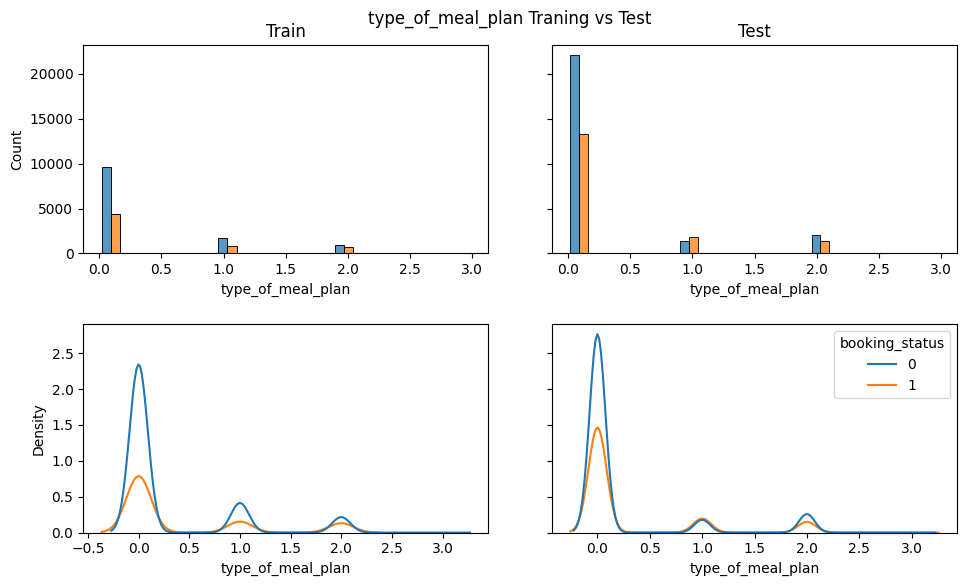

In [15]:
plot_test_vs_train_variables_multiple(df,df_test,"type_of_meal_plan","booking_status")

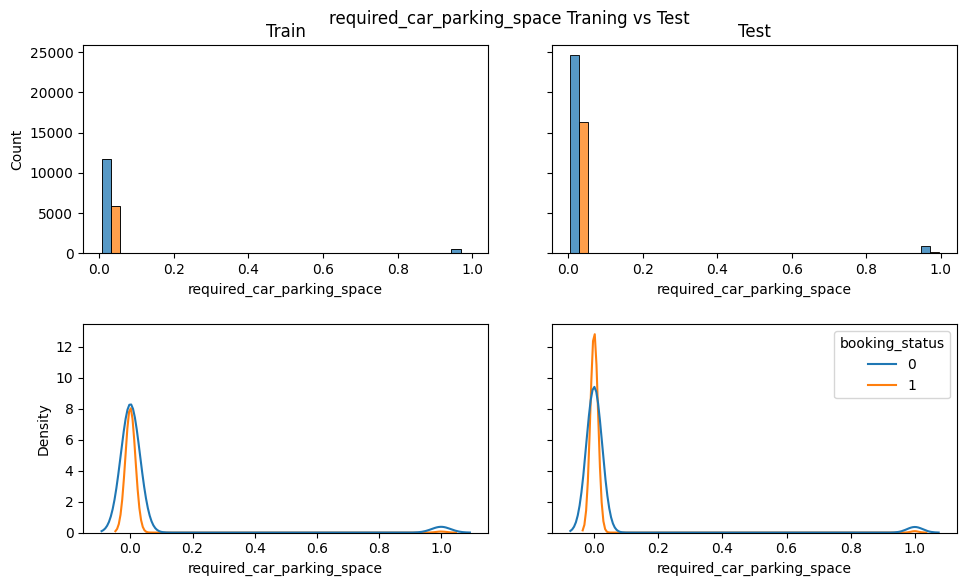

In [16]:
plot_test_vs_train_variables_multiple(df,df_test,"required_car_parking_space","booking_status")

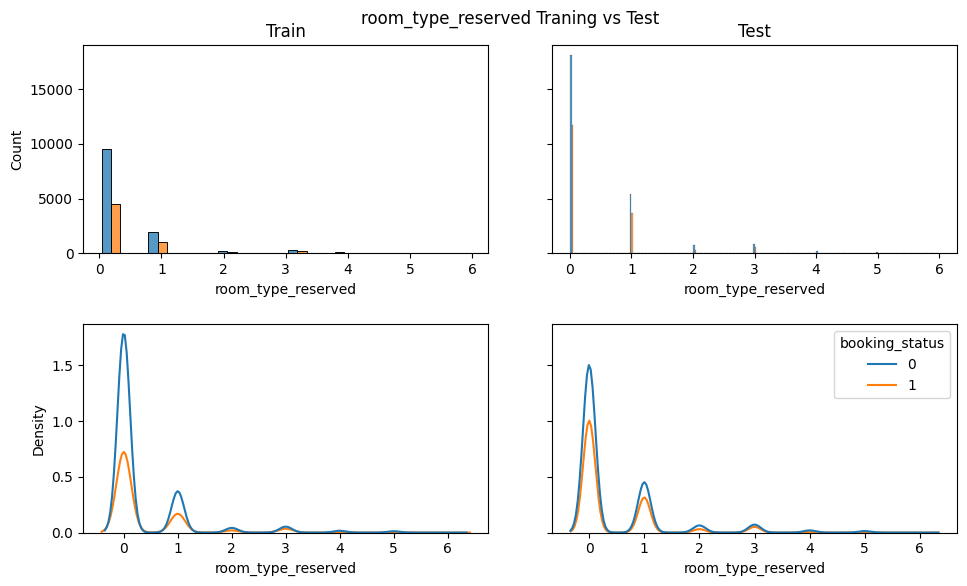

In [17]:
plot_test_vs_train_variables_multiple(df,df_test,"room_type_reserved","booking_status")

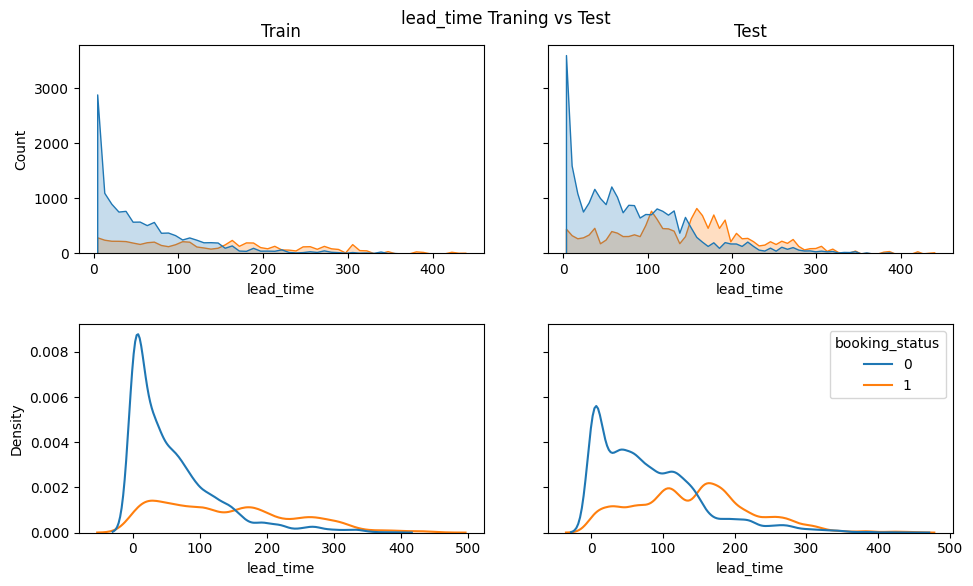

In [18]:
plot_test_vs_train_variables_element(df,df_test,"lead_time","booking_status")

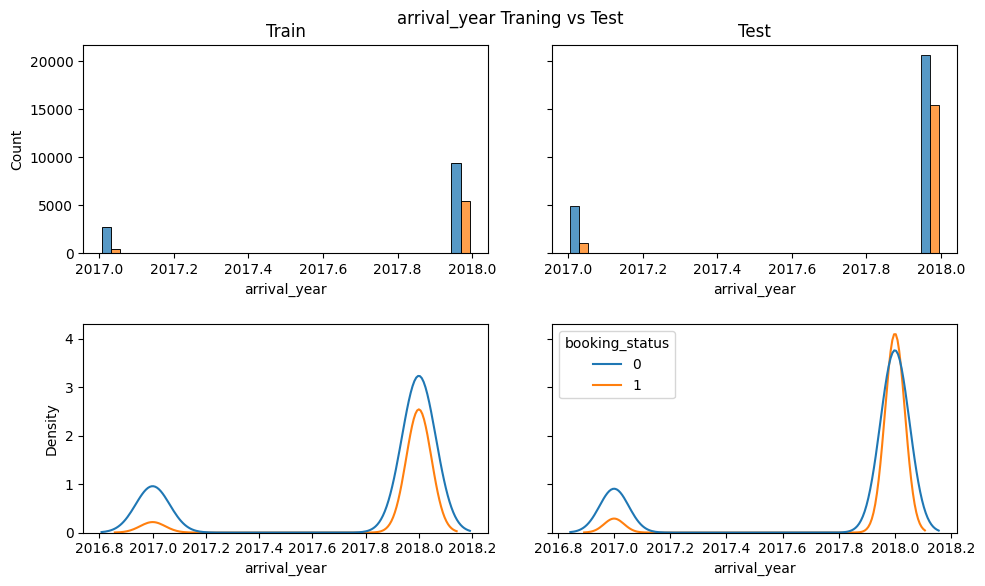

In [19]:
plot_test_vs_train_variables_multiple(df,df_test,"arrival_year","booking_status")

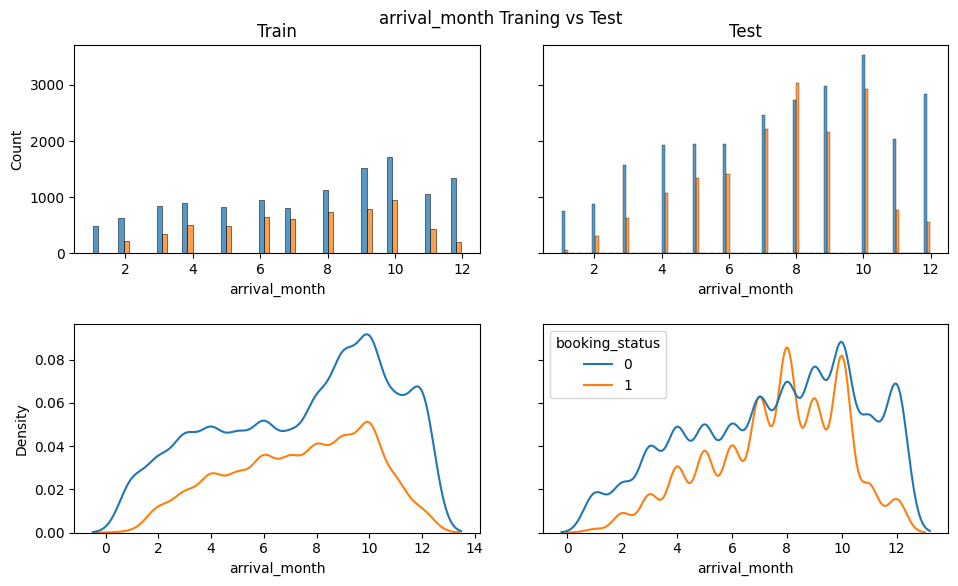

In [20]:
plot_test_vs_train_variables_multiple(df,df_test,"arrival_month","booking_status")

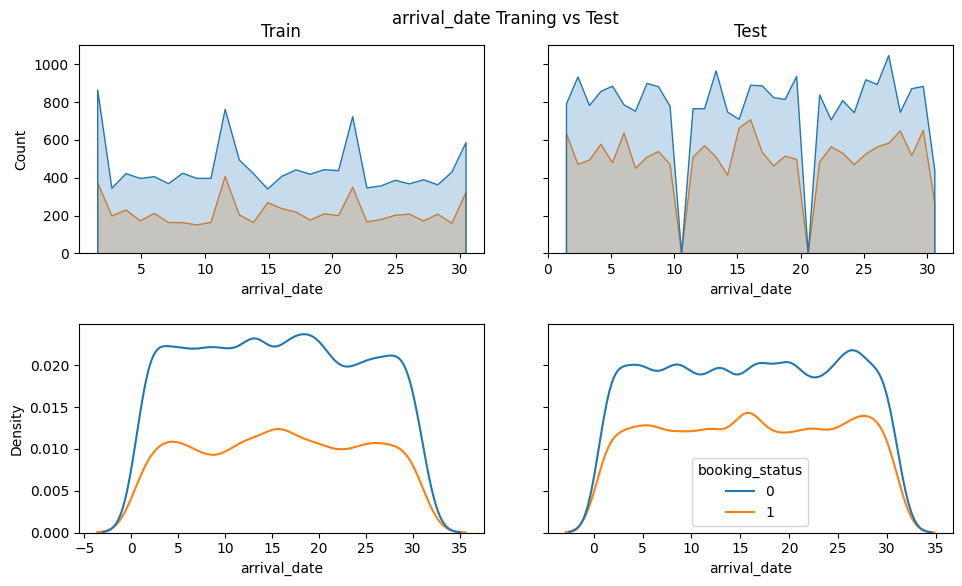

In [21]:
plot_test_vs_train_variables_element(df,df_test,"arrival_date","booking_status")

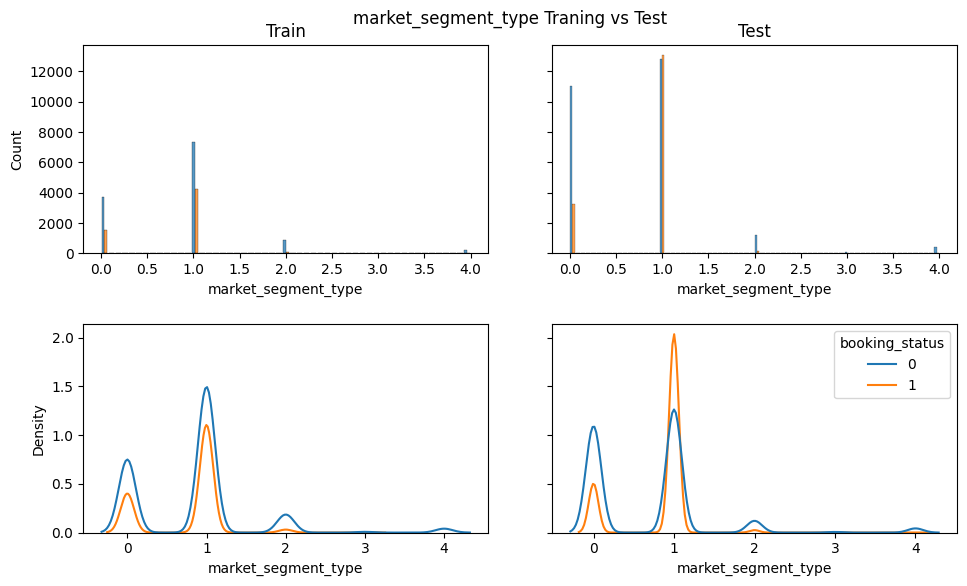

In [22]:
plot_test_vs_train_variables_multiple(df,df_test,"market_segment_type","booking_status")


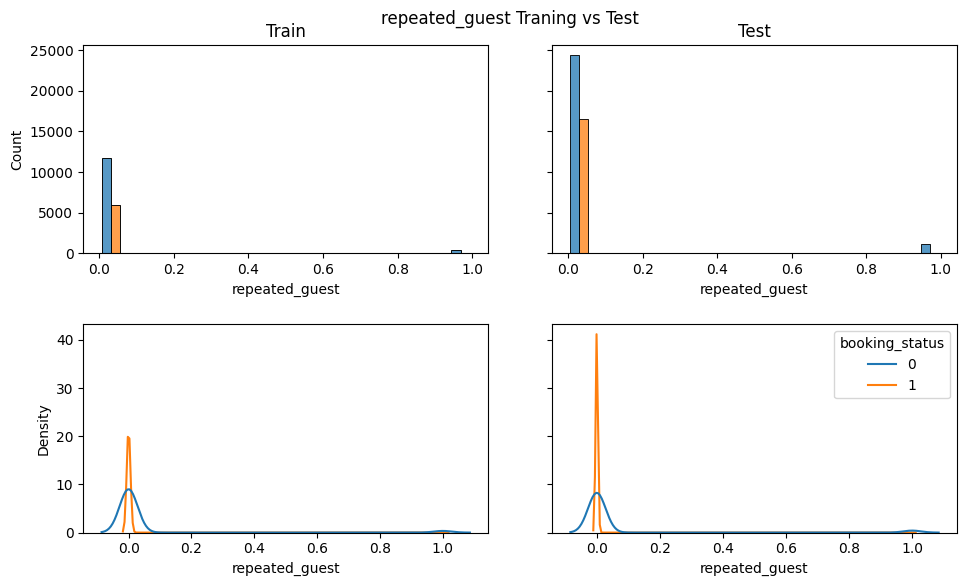

In [23]:
plot_test_vs_train_variables_multiple(df,df_test,"repeated_guest","booking_status")

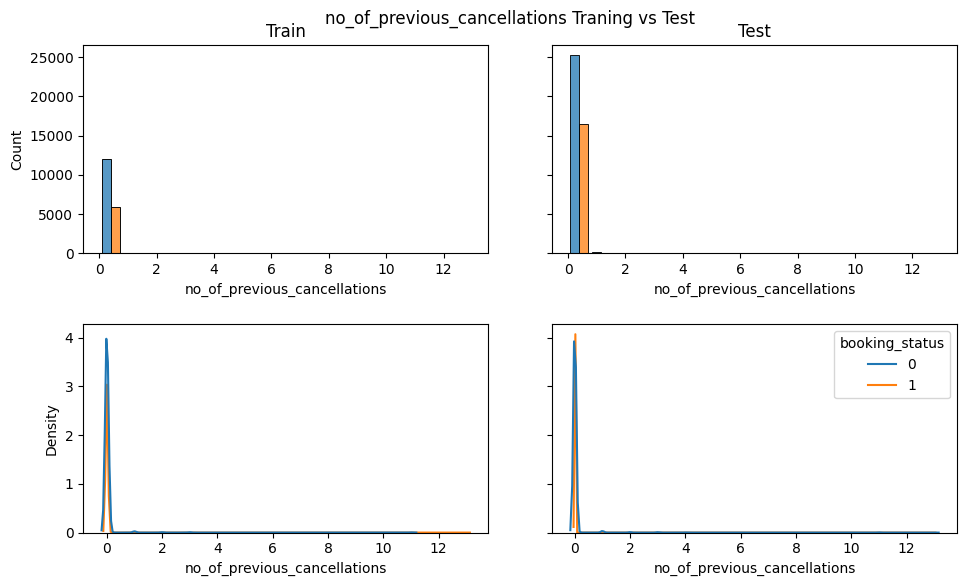

In [24]:
plot_test_vs_train_variables_multiple(df,df_test,"no_of_previous_cancellations","booking_status")

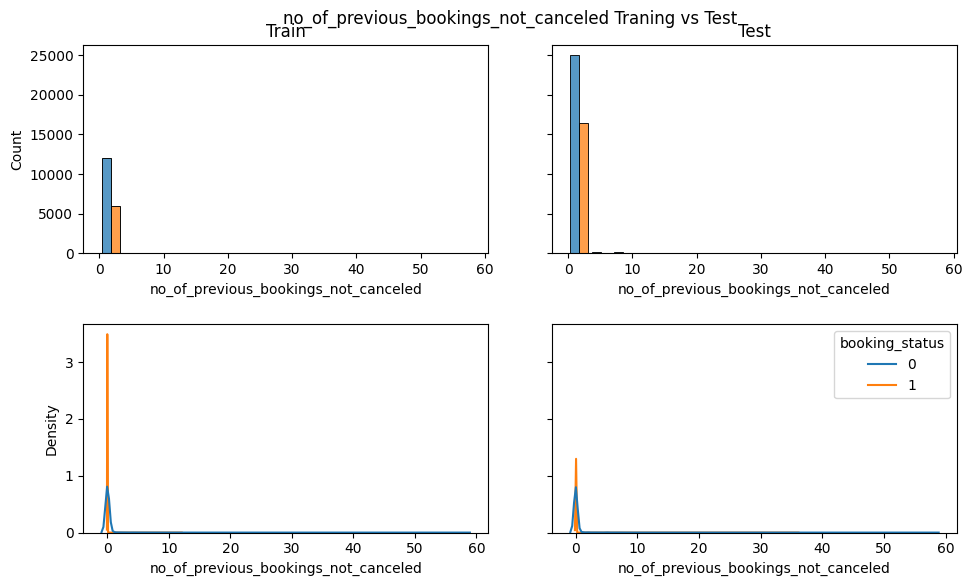

In [25]:
plot_test_vs_train_variables_multiple(df,df_test,"no_of_previous_bookings_not_canceled","booking_status")

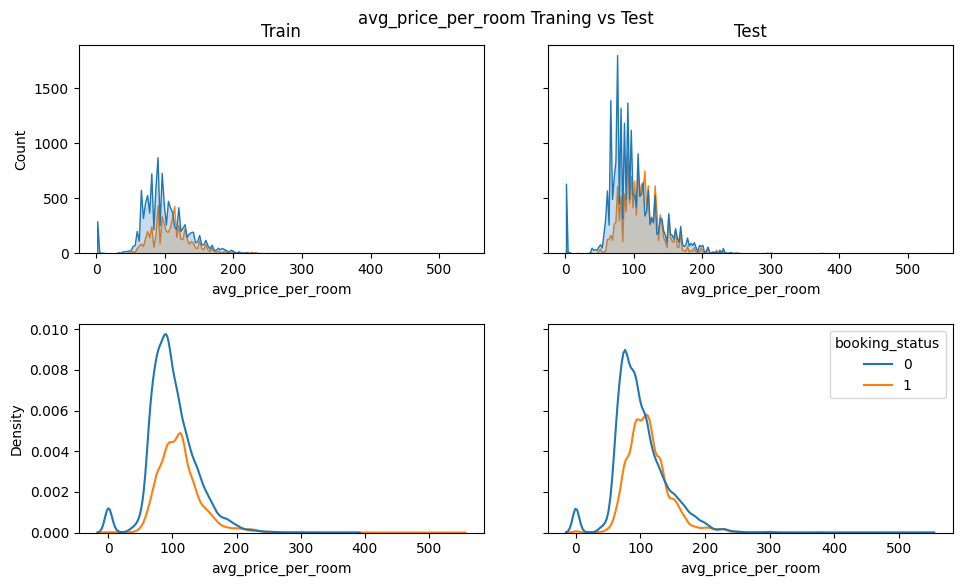

In [26]:
plot_test_vs_train_variables_element(df,df_test,"avg_price_per_room","booking_status")

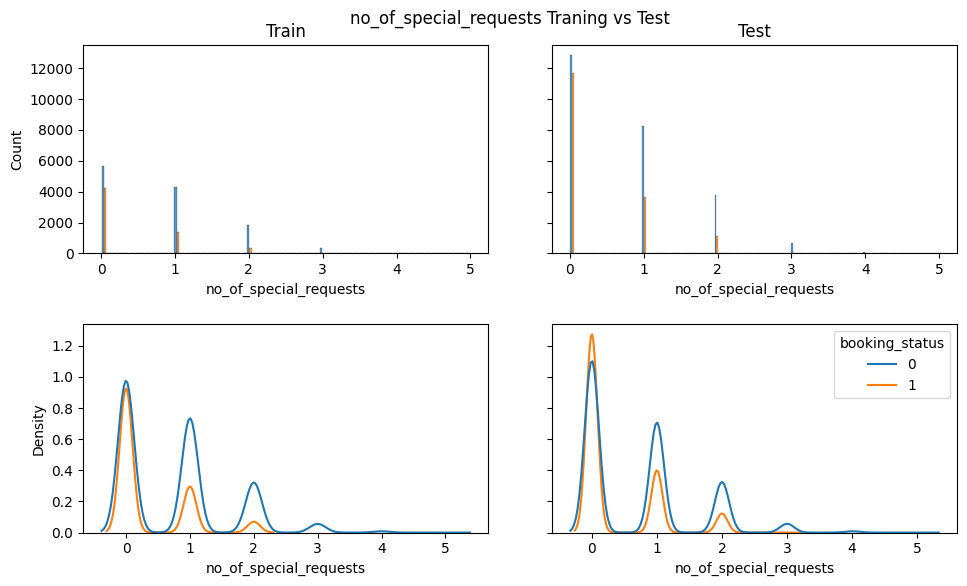

In [27]:
plot_test_vs_train_variables_multiple(df,df_test,"no_of_special_requests","booking_status")

Pulled the below code from the following website to get the day number in the year. 
https://www.tutorialspoint.com/day-of-the-year-in-python

In [28]:
def dayOfYear(date):
    days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
    d = list(map(int,date.split("-")))
    if d[0] % 400 == 0:
        days[2]+=1
    elif d[0]%4 == 0 and d[0]%100!=0:
        days[2]+=1
    for i in range(1,len(days)):
        days[i]+=days[i-1]
    return days[d[1]-1]+d[2]

In [29]:
def create_dummies(dataframe, column):
    just_dummies = pd.get_dummies(dataframe[column],  prefix = column)
    dataframe = pd.concat([dataframe, just_dummies], axis=1)
    dataframe.drop([column], inplace = True, axis = 1)
    return dataframe

In [30]:
def tranform_columns(dataframe):
    #categorical variables
    #create dummy variables
    dataframe = create_dummies(dataframe, 'type_of_meal_plan')
    dataframe = create_dummies(dataframe, 'room_type_reserved')
    dataframe = create_dummies(dataframe, 'market_segment_type')
    
    #creating day number of the year in a list
    arrival_day_number = []
    day_of_week = []
    for index, row in dataframe.iterrows():
        arrival_date = str(row["arrival_year"]).replace('.0','') + "-" \
        + str(row["arrival_month"]).replace('.0','').zfill(2) + "-" \
        + str(row["arrival_date"]).replace('.0','').zfill(2)
        arrival_day_number.append(dayOfYear(arrival_date))
        try:
            day_of_week.append(pd.Timestamp(arrival_date).isoweekday())
        except:
            day_of_week.append(-1)
            
    dataframe['length_of_stay'] = dataframe['no_of_weekend_nights'] + dataframe['no_of_week_nights'] 
    dataframe['arrival_day_number'] = arrival_day_number
    dataframe['day_of_week'] = day_of_week
    
    dataframe = create_dummies(dataframe, 'day_of_week')
    
    dataframe['total_guests'] = dataframe['no_of_adults'] + dataframe['no_of_children']
    dataframe['single_parent_with_children'] = np.where(((dataframe['no_of_adults'] == 1) &
                                                         (dataframe['no_of_children'] >0))==0,0,1)
    dataframe['bad_booking'] = np.where((dataframe['no_of_adults'] < 1) & (dataframe['no_of_children'] >0) == 1,1,0)
    
    
    return dataframe
    
df = tranform_columns(df)   
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,total_guests,single_parent_with_children,bad_booking
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,1,0,0,0,2,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,1,0,3,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,1,0,0,0,0,0,1,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,1,0,2,0,0


In [82]:
for i in df.columns:
    print(i)

no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
required_car_parking_space
lead_time
arrival_year
arrival_month
arrival_date
repeated_guest
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
avg_price_per_room
no_of_special_requests
booking_status
type_of_meal_plan_0
type_of_meal_plan_1
type_of_meal_plan_2
type_of_meal_plan_3
room_type_reserved_0
room_type_reserved_1
room_type_reserved_2
room_type_reserved_3
room_type_reserved_4
room_type_reserved_5
room_type_reserved_6
market_segment_type_0
market_segment_type_1
market_segment_type_2
market_segment_type_3
market_segment_type_4
length_of_stay
arrival_day_number
day_of_week_-1
day_of_week_1
day_of_week_2
day_of_week_3
day_of_week_4
day_of_week_5
day_of_week_6
day_of_week_7
total_guests
single_parent_with_children
bad_booking


Reviewing all of the variables correlation.

In [31]:
corr = df.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,total_guests,single_parent_with_children,bad_booking
no_of_adults,1.000000,-0.017565,0.098241,0.103135,0.010956,0.098254,0.077915,0.018254,0.028433,-0.198334,...,0.030252,0.044356,-0.028535,-0.062103,-0.038659,0.015796,0.034726,0.779546,-0.103601,-0.217931
no_of_children,-0.017565,1.000000,0.026761,0.018957,0.026409,-0.051646,0.044164,0.008244,0.020804,-0.037868,...,0.018050,0.006887,-0.006946,-0.010368,-0.006713,-0.013655,0.011119,0.612556,0.214996,0.286273
no_of_weekend_nights,0.098241,0.026761,1.000000,0.188796,-0.029054,0.047559,0.054914,-0.010060,0.024026,-0.058549,...,0.112091,0.432025,0.207379,-0.182264,-0.271641,-0.215976,-0.083082,0.094429,0.041762,0.013169
no_of_week_nights,0.103135,0.018957,0.188796,1.000000,-0.054087,0.148348,0.037240,0.044170,-0.007471,-0.094936,...,-0.103004,-0.188609,-0.041683,0.131912,0.137985,0.112712,-0.039934,0.093408,0.030709,0.012743
required_car_parking_space,0.010956,0.026409,-0.029054,-0.054087,1.000000,-0.076608,0.006502,-0.018159,-0.008735,0.116001,...,0.003484,-0.003180,0.005332,0.018437,0.007432,-0.003793,-0.024911,0.025205,-0.001396,-0.011008
lead_time,0.098254,-0.051646,0.047559,0.148348,-0.076608,1.000000,0.148482,0.140062,0.012856,-0.135079,...,-0.021391,-0.030064,-0.030802,-0.046844,-0.015724,0.028834,0.105647,0.045322,-0.011098,0.012337
arrival_year,0.077915,0.044164,0.054914,0.037240,0.006502,0.148482,1.000000,-0.343696,0.008437,-0.018765,...,-0.134379,0.020736,0.065982,-0.011333,0.004178,0.004406,0.046533,0.089261,0.011222,0.021354
arrival_month,0.018254,0.008244,-0.010060,0.044170,-0.018159,0.140062,-0.343696,1.000000,-0.034861,-0.004458,...,0.008673,-0.038615,-0.017043,-0.002210,-0.003907,0.029422,0.025584,0.019595,-0.004320,-0.000294
arrival_date,0.028433,0.020804,0.024026,-0.007471,-0.008735,0.012856,0.008437,-0.034861,1.000000,-0.010958,...,-0.017219,0.030231,0.004235,0.005932,-0.001424,-0.007931,-0.016179,0.035510,-0.004156,0.017066
repeated_guest,-0.198334,-0.037868,-0.058549,-0.094936,0.116001,-0.135079,-0.018765,-0.004458,-0.010958,1.000000,...,-0.043527,-0.027588,0.026230,0.035417,0.050759,-0.002379,-0.036083,-0.180515,-0.010127,-0.009768


In [32]:
RFC = RandomForestClassifier(bootstrap=True,oob_score=True)

First run all variables through the model before running our selected features.

In [33]:
preds = [x for x in list(df) if x not in ['booking_status']]
len(preds)

43

In [34]:
X = df[preds]
y = df['booking_status'].values

In [35]:
X_test = tranform_columns(df_test)[preds]
y_test = df_test['booking_status'].values

In [36]:
full = cross_val_score(RFC, X, y, scoring='accuracy', cv=5, n_jobs=-1, verbose=0)
full_accuracy1 ='{:.1%}'.format(np.mean(full))
print(f'Average Cross Validation Accuracy using full set of variables = {full_accuracy1}')

Average Cross Validation Accuracy using full set of variables = 89.0%


In [37]:
y_test_probabilities1 = RFC.fit(X ,y).predict(X_test)
accuracy_result_all_variables1 = (balanced_accuracy_score(y_test,y_test_probabilities1))
accuracy_result_all_variables1 = '{:.1%}'.format(accuracy_result_all_variables1)

In [38]:
print(f'Balanced Accuracy Test Data:{accuracy_result_all_variables1}')

Balanced Accuracy Test Data:79.2%


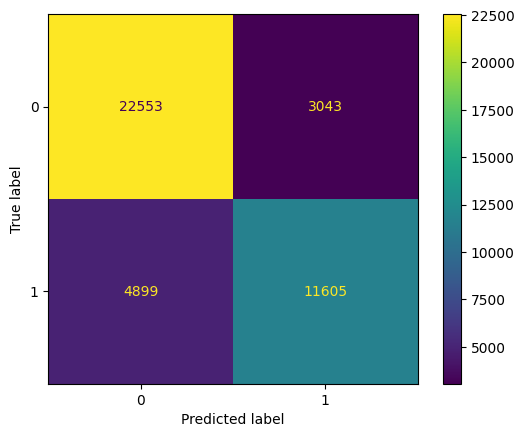

In [41]:
cm = confusion_matrix(y_test, y_test_probabilities1)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

Use featurewiz to help decide on which features to use. 

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (18137, 44)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sampl

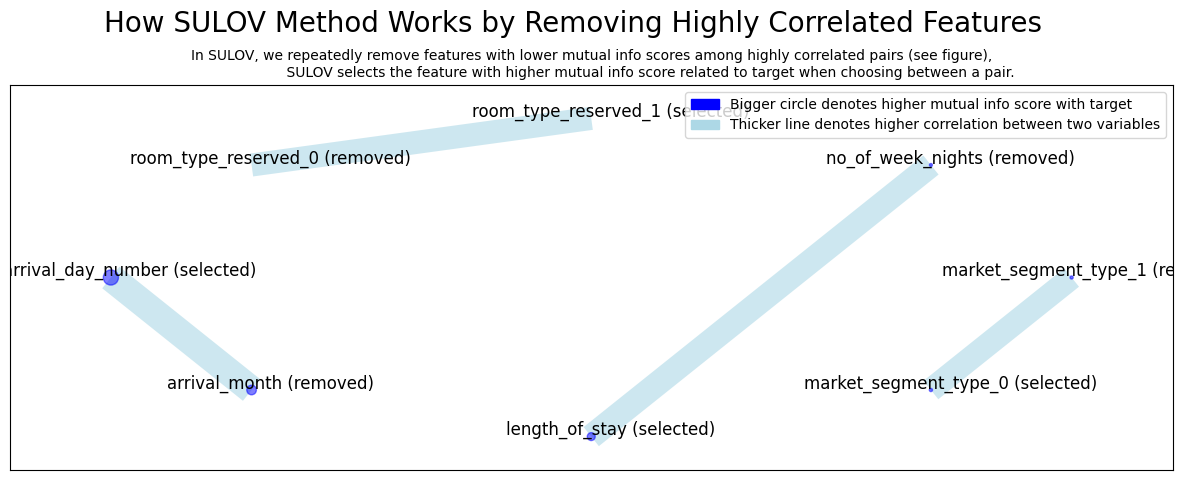

Time taken for SULOV method = 3 seconds
    Adding 0 categorical variables to reduced numeric variables  of 39
Finally 39 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 10 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
Number of booster rounds = 100
        Selected: ['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'arrival_day_number', 'market_segment_type_0', 'arrival_date', 'length_of_stay', 'total_guests', 'no_of_weekend_nights', 'arrival_year']
            Time taken for regular XGBoost feature selection = 2 seconds
        Selected: ['avg_price_per_room', 'arrival_day_number', 'no_of_special_re

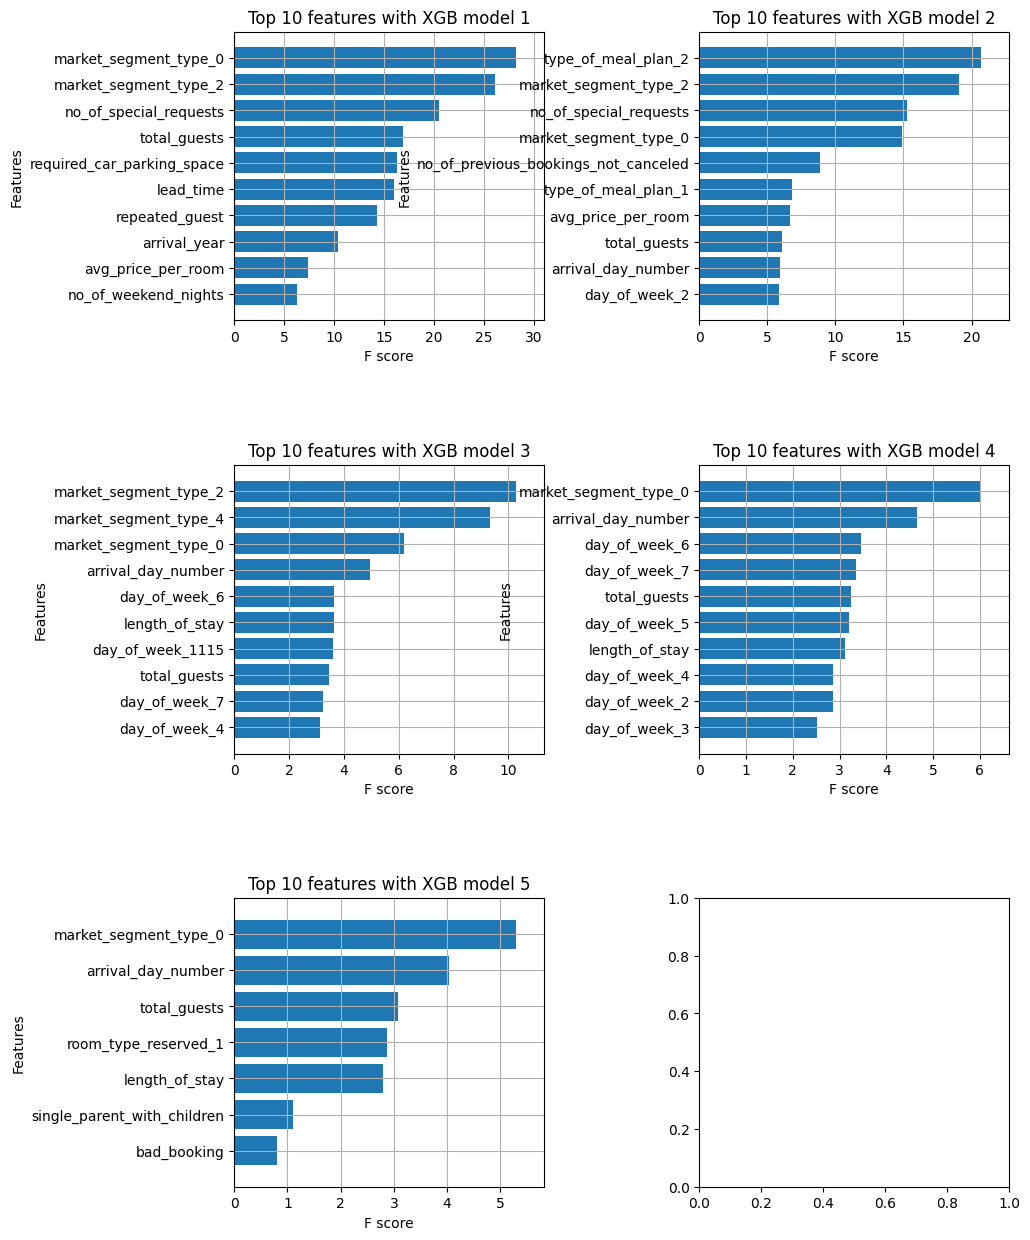

    Completed XGBoost feature selection in 3 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 21 important features:
['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'arrival_day_number', 'market_segment_type_0', 'arrival_date', 'length_of_stay', 'total_guests', 'no_of_weekend_nights', 'arrival_year', 'type_of_meal_plan_2', 'market_segment_type_2', 'day_of_week_7', 'room_type_reserved_1', 'day_of_week_6', 'day_of_week_1115', 'market_segment_type_4', 'day_of_week_2', 'day_of_week_5', 'single_parent_with_children', 'bad_booking']
Total Time taken for featurewiz selection = 10 seconds
Output contains a list of 21 important features and a train dataframe


2

In [42]:
features = featurewiz(df, 'booking_status', corr_limit = .8, verbose = 2)
len(features)

In [43]:
features[0]

['lead_time',
 'avg_price_per_room',
 'no_of_special_requests',
 'arrival_day_number',
 'market_segment_type_0',
 'arrival_date',
 'length_of_stay',
 'total_guests',
 'no_of_weekend_nights',
 'arrival_year',
 'type_of_meal_plan_2',
 'market_segment_type_2',
 'day_of_week_7',
 'room_type_reserved_1',
 'day_of_week_6',
 'day_of_week_1',
 'market_segment_type_4',
 'day_of_week_2',
 'day_of_week_5',
 'single_parent_with_children',
 'bad_booking']

In [44]:
RFC2 = RandomForestClassifier(bootstrap=True,oob_score=True)

In [45]:
X2 = df[features[0]]

In [46]:
X2_test = tranform_columns(df_test)[features[0]]
y2_test = df_test['booking_status'].values

Text(0.5, 0.98, 'arrival_day_number Traning vs Test')

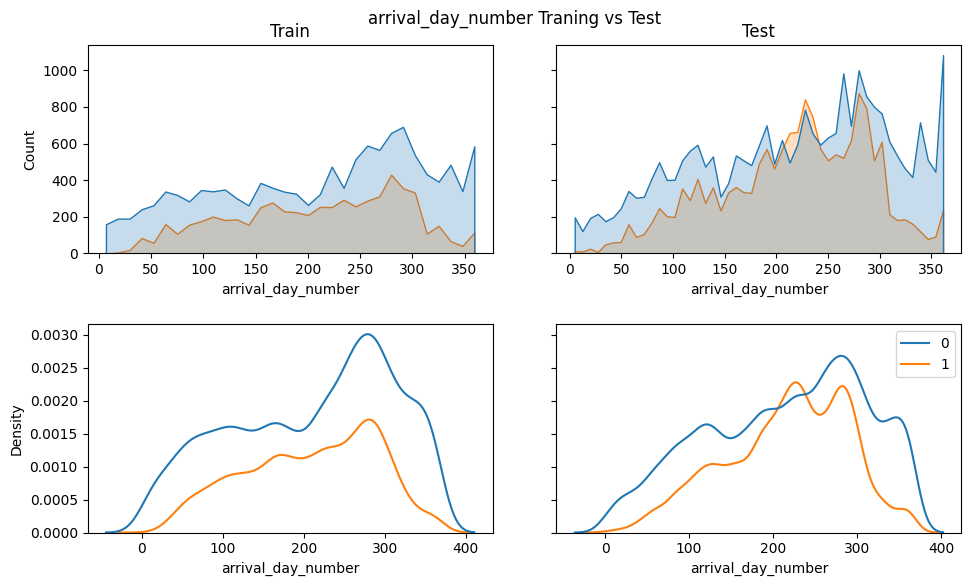

In [47]:

f, axes = plt.subplots(2, 2, sharey ='row', figsize=(10,6))
f.tight_layout(pad =3)
sns.histplot(x=X2.arrival_day_number, hue=y, element = 'poly', shrink =.8, ax = axes[0,0], legend =False).set_title("Train")
sns.histplot(x=X2_test.arrival_day_number, hue=y2_test, element = 'poly', shrink =.8, ax = axes[0,1], legend =False).set_title("Test")
sns.kdeplot( x=X2.arrival_day_number, hue=y,ax = axes[1,0], legend =False)
sns.kdeplot(x=X2_test.arrival_day_number, hue=y2_test,ax = axes[1,1])
f.suptitle('arrival_day_number Traning vs Test')

In [48]:
full = cross_val_score(RFC2, X2, y, scoring='f1', cv=5, n_jobs=-1, verbose=0)
full_accuracy2 ='{:.1%}'.format(np.mean(full))
print(f'Average Cross Validation Accuracy using feature selection variables = {full_accuracy2}')

Average Cross Validation Accuracy using feature selection variables = 82.1%


In [49]:
y_test_probabilities2 = RFC2.fit(X2 ,y).predict(X2_test)
accuracy_result_all_variables = (balanced_accuracy_score(y_test,y_test_probabilities2))
accuracy_result_all_variables2 = '{:.1%}'.format(accuracy_result_all_variables)

In [50]:
print(f'Balanced Accuracy Test Data:{accuracy_result_all_variables2}')

Balanced Accuracy Test Data:79.2%


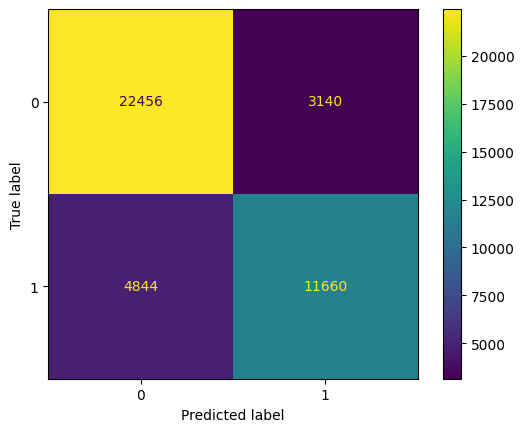

In [51]:
cm = confusion_matrix(y_test, y_test_probabilities2)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [52]:
RFC3 = RandomForestClassifier(bootstrap=True,oob_score=True)

In [53]:
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20)}

rand_search = RandomizedSearchCV(RFC3, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013E00D2C280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013E00D28190>})

In [54]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 451}


In [55]:
y_test_probabilities3 = best_rf.predict(X_test)
accuracy = '{:.1%}'.format(accuracy_score(y_test, y_test_probabilities3))
print(f'Validation Accuracy using hyperparameter tuning = {accuracy}')

Validation Accuracy using hyperparameter tuning = 81.4%


In [56]:
accuracy_result_all_variables3 = (balanced_accuracy_score(y_test,y_test_probabilities3))
accuracy_result_all_variables3 = '{:.1%}'.format(accuracy_result_all_variables3)

In [57]:
print(f'Balanced Accuracy Test Data:{accuracy_result_all_variables3}')

Balanced Accuracy Test Data:79.6%


Text(0.5, 1.0, 'Confusion Matrix Hyperparameter Tuning')

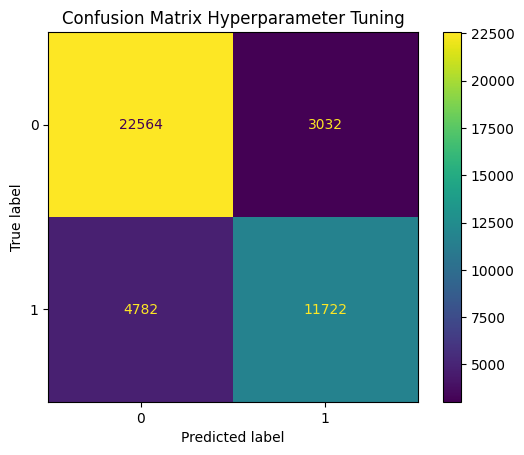

In [67]:
cm = confusion_matrix(y_test, y_test_probabilities3)
  
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
plt.title('Confusion Matrix Hyperparameter Tuning')

In [78]:
model = ['Random Forest Classifier All Features',
         'Random Forest Classifier All Features',
         'Random Forest Classifier Features Selection',
         'Random Forest Classifier Features Selection',
         'Random Forest Classifier Hyperparameter Tuning',
         'Random Forest Classifier Hyperparameter Tuning'         
        ]
accuracy_score_type = ['accuracy', 
                       'balance',
                      'accuracy', 
                       'balance',
                      'accuracy', 
                       'balance']
accuracy_scores = [full_accuracy1,
                   accuracy_result_all_variables1,
                   full_accuracy2,
                   accuracy_result_all_variables2,
                   accuracy,
                   accuracy_result_all_variables3]

accuracy_scores_float = []
for value in accuracy_scores:
    accuracy_scores_float.append(float(value.replace('%',''))/100)

accuracy_table = pd.DataFrame(list(zip(model,accuracy_score_type,accuracy_scores_float)), columns =['model','accuracy_score_type','accuracy_scores'])
len(accuracy_table)

6

In [79]:
accuracy_table

,model,accuracy_score_type,accuracy_scores
0,Random Forest Classifier All Features,accuracy,0.890
1,Random Forest Classifier All Features,balance,0.792
2,Random Forest Classifier Features Selection,accuracy,0.821
3,Random Forest Classifier Features Selection,balance,0.792
4,Random Forest Classifier Hyperparameter Tuning,accuracy,0.814
5,Random Forest Classifier Hyperparameter Tuning,balance,0.796


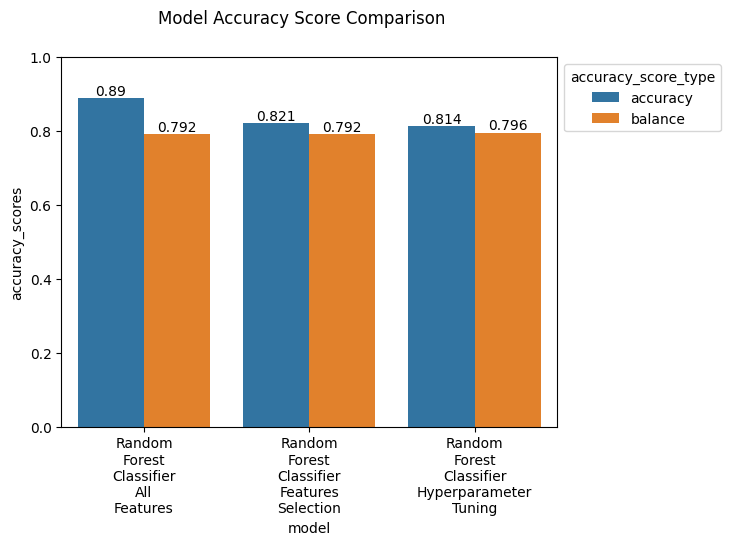

In [80]:
model_x_labels = []
for i in range(len(model)):
    if i % 2 == 0:
        model_x_labels.append(model[i].replace(' ','\n'))
f, ax = plt.subplots()
ax = sns.barplot(data = accuracy_table, x = 'model',y ='accuracy_scores', hue = 'accuracy_score_type')
ax.set_xticklabels(model_x_labels)
ax.set_ylim(0.0,1.0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

f.suptitle('Model Accuracy Score Comparison')

for i in ax.containers:
    ax.bar_label(i,)

In [69]:
cols = ['dataset', 'percent_cancelled']
dataset = ['train', 'test']
percent_cancelled = [(sum(y)/len(y))*100,(sum(y_test)/len(y_test))*100]
cancellations = pd.DataFrame(list(zip(dataset,percent_cancelled)), columns = cols)

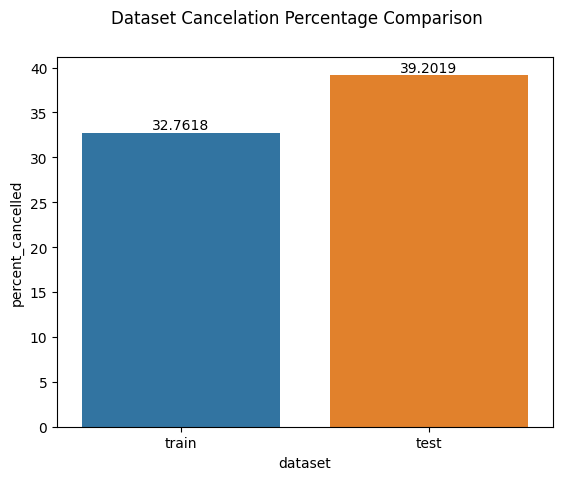

In [81]:
f, ax = plt.subplots()
ax = sns.barplot(data = cancellations, x = 'dataset',y ='percent_cancelled')

f.suptitle('Dataset Cancelation Percentage Comparison')


for i in ax.containers:
    ax.bar_label(i,)
    